In [9]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# Conflict and Commuting Zones

In [31]:
acled = pd.read_csv('../../data/conflict/Niger_conflict_data.csv')

In [35]:
acled['event_date'] = acled['event_date'].apply(lambda x: pd.to_datetime(x, format='YYYY-MM-DD'))

In [49]:
acled['nrEvents'] = 1

In [50]:
acled_yearly = acled.groupby([pd.Grouper(key='event_date', freq='YS'), 'latitude', 'longitude', 'actor1', 'actor2', 'country', 'admin1', 'admin2', 'event_type', 'sub_event_type']).sum().reset_index()

In [4]:
commuting_zones_niger = gpd.read_file('../../data/movement/meta/commuting_zones/commuting_zones_niger.json')

In [7]:
niger_adm0 = gpd.read_file('../../data/shapefiles/ner_adm_ignn_20230720_ab_shp/NER_admbnda_adm0_IGNN_20230720.shp')
niger_adm1 = gpd.read_file('../../data/shapefiles/ner_adm_ignn_20230720_ab_shp/NER_admbnda_adm1_IGNN_20230720.shp')
niger_adm2 = gpd.read_file('../../data/shapefiles/ner_adm_ignn_20230720_ab_shp/NER_admbnda_adm2_IGNN_20230720.shp')

In [54]:
acled_yearly = gpd.GeoDataFrame(
    acled_yearly, 
    geometry=gpd.points_from_xy(acled_yearly.longitude, acled_yearly.latitude), crs='epsg:4326'
)

In [ ]:
acled_yearly_adm2 = niger_adm2.merge(niger_adm2.sjoin(acled_yearly).groupby(['ADM1_FR', 'ADM2_FR', 'event_date'])[['fatalities', 'nrEvents']].sum().reset_index())

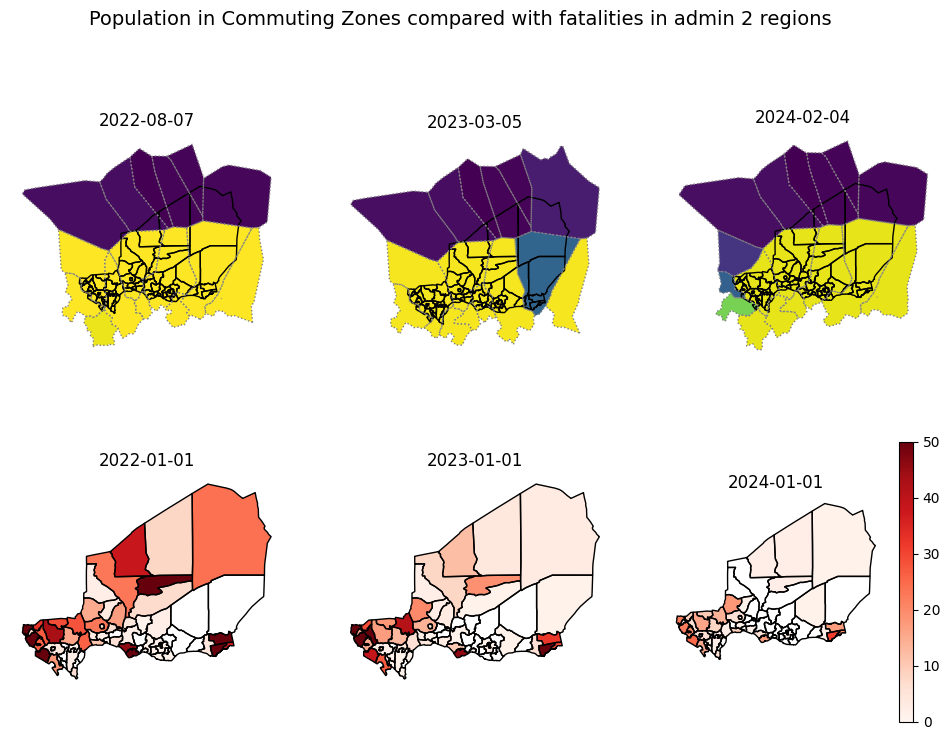

In [87]:
import matplotlib.colors as mcolors
from matplotlib.pyplot import colorbar

fig, axs = plt.subplots(2,3, figsize=(12,8))
ax=axs.flatten()

for i, date in enumerate(['2022-08-07', '2023-03-05', '2024-02-04']):

    if i>4:
        legend_bool=True
    else:
        legend_bool=False

    niger_adm2.boundary.plot(ax=ax[i], color='black', linewidth=1)
    commuting_zones_niger[commuting_zones_niger['ds']==date].boundary.plot(ax=ax[i], color='grey', linewidth=1, linestyle='dotted')
    commuting_zones_niger[commuting_zones_niger['ds']==date].plot(ax=ax[i], column='win_population', cmap='viridis', vmin=0, vmax=4500000, legend=legend_bool)
    ax[i].set_title(date)

    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)

for idx, date in enumerate(['2022-01-01', '2023-01-01', '2024-01-01']):
    i = idx+3

    if i>4:
        legend_bool=True
    else:
        legend_bool=False

    niger_adm2.boundary.plot(ax=ax[i], color='black', linewidth=1)
    acled_yearly_adm2[acled_yearly_adm2['event_date']==date].plot(ax=ax[i], column='nrEvents', cmap='Reds',vmin=0, vmax=50, legend=legend_bool)
    ax[i].set_title(date)

    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)



#ax[0].text(0,0,'Source: Meta Commuting Zones')

plt.suptitle('Population in Commuting Zones compared with fatalities in admin 2 regions', x=0.5, y=1, fontsize=14);

#fig.savefig('../../docs/images/commuting_zones_population.svg', format='SVG', dpi=300);
